In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Hypothesis Testing

## Motivation:

#### In social science, business, and many other domains, we often want to compare two groups of things, but we cannot observe the entire populations and must rely on samples.

####  Because samples vary, it's not immediately obvious whether an observed difference is due to chance alone (sampling variation) or due to an underlying difference between populations. 

#### However, we can exploit the fact that samples vary in a predictable way (due to the Central Limit Theoreom) in order to make comparisons and quantify the uncertainty of thsoe comparisons.

## Infomal Steps of a Hypothesis Test

1. We make some hypothesis about the world (often in the form "Group A is different from Group B.")

2. Then we make another hypothesis  (the null hypothesis) that is the opposite of our original hypothesis. (Often in the form: "There is no significant difference between Group A and Group B.")

3. Then we ask the question: Assuming the Null Hypothesis is true, what is the probability that we drew the sample(s)? (Or... Given that there is no significant difference Group A and Group B, what is the chance that we observed the difference that we observed between the samples of the groups?)

## Formal Steps of a Hypothesis Test

1. State Null Hypothesis
2. State Alternative Hypothesis
3. Set Alpha
4. Collect Data
5. Calculate Test Statistic
6. Construct Rejection Regions
7. Draw conclusion

## Questions to Answer about which statistical test to use:
- One-sample or two-sample test?
- If it's a two-sample test, are the samples paired or independent?
- A two-tailed or one-tailed test?
- A z-test or a t-test?

## Pop quiz: What is alpha?

<span style="color:white"> 
With respect to hypothesis tests, alpha refers to significance level, the probability of making a Type I error, i.e., rejecting the null hypothesis when it is true.  
</span>

## Pop quiz: What is p?

<span style="color:white"> 
p is the probability of drawing the sample(s) you drew, or one(s) more extreme, by chance alone, given that the null hypothesis is true.
</span>

# Demo

## Independent sample T-tests with plots

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import figure_factory as ff

#### Generate Data
Let us generate some random data from the `Normal Distriubtion`. We will sample 50 points from a normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$ and from another with mean $\mu = 2$ and variance $\sigma^2 = 1$.

In [3]:
data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(2, 1, size=50)

#### Plot the distributions from which samples were drawn

In [4]:
x = np.linspace(-4, 6, 160)
y1 = stats.norm.pdf(x)
y2 = stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

data = [trace1, trace2]

py.iplot(data, filename='normal-dists-plot')

/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Plot Sample Histograms

In [5]:
trace1 = go.Histogram(
    x=data1,
    opacity=0.75
)
trace2 = go.Histogram(
    x=data2,
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

#### Plot sample histograms using matplotlib, with mean and kde curve shown

/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/Users/jameshelfrich/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



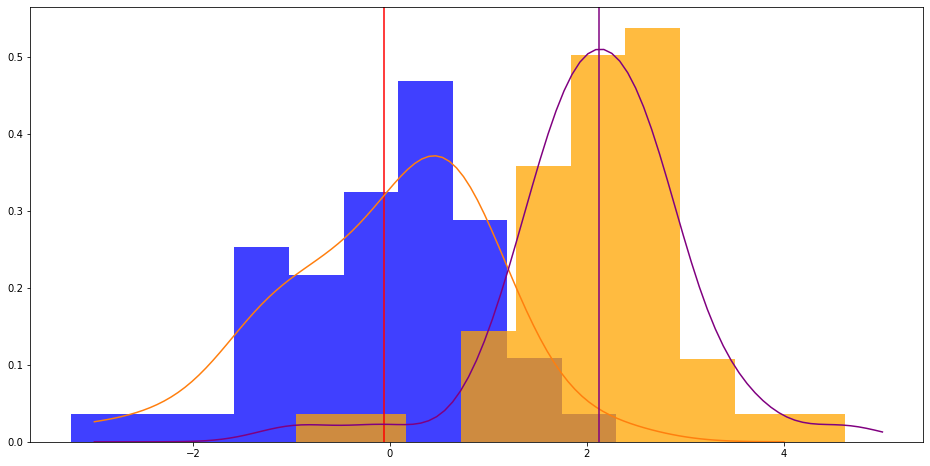

In [6]:
kde_data1 = stats.gaussian_kde(data1)
kde_data2 = stats.gaussian_kde(data2)
plt.figure(figsize=(16,8))
l = plt.hist(data1, bins=10, normed=True, facecolor='blue', alpha=0.75)
l_mean = plt.axvline(data1.mean(), color="red")
l_dist = plt.plot(np.linspace(-3,4, 100), kde_data1(np.linspace(-3,4, 100)))
m = plt.hist(data2, bins=10, normed=True, facecolor='orange', alpha=0.75)
m_mean = plt.axvline(data2.mean(), color="purple")
m_dist = plt.plot(np.linspace(-3,5, 100), kde_data2(np.linspace(-3,5, 100)), color="purple")

### Perform Hypothesis Test

A `One Sample T-Test` is a statistical test used to evaluate the null hypothesis that the mean $m$ of a 1D sample dataset of independant observations is equal to the true mean $\mu$ of the population from which the data is sampled. In other words, our null hypothesis is that

$$
\begin{align*}
m = \mu
\end{align*}
$$

For our T-test, we will be using a significance level of `0.05`. On the matter of doing ethical science, it is good practice to always state the chosen significance level for a given test _before_ actually conducting the test. This is meant to ensure that the analyst does not modify the significance level for the purpose of achieving a desired outcome.

In [7]:
true_mu = 0
data1_results = stats.ttest_1samp(data1, true_mu)
data1_results

Ttest_1sampResult(statistic=-0.3997792877480531, pvalue=0.6910564948580504)

Since our p-value is larger than our pre-specified significance level, we must fail to reject the null-hypothesis. This is our expected result because the data was collected from a normal distribution with the same population mean for which we performed the test.

In [8]:
true_mu = 0
data2_results = stats.ttest_1samp(data2, true_mu)
data2_results

Ttest_1sampResult(statistic=17.15766392859348, pvalue=2.34315429878689e-22)

Since our p-value is infinitesimally small (i.e., much smaller than alpha = 0.05), we have good evidence to reject the null-hypothesis. This is our expected result because the data was collected from a normal distribution with a different population mean.

### Reimplimenting one-sample t-test

In [9]:
sample_1 = [4.15848606,  3.86146363,  4.31545726,  3.3748772,
            4.67023082, 4.45950272,  3.85894915,  4.41089417,
            3.82360986,  3.79889443, 4.75884172,  3.27100914,
            4.08939402,  4.08904694,  5.62589842, 3.71445656,
            3.58463792,  4.42426443,  3.9671448 ,  4.39339124]

sample_2 = [10.81261135, 9.68035252, 9.87293556,  10.06308861,
            9.57381722, 10.00922156, 10.90522431, 9.70843104,
            10.16614481, 10.09447189, 10.51260742, 10.17503686,
            10.38718472, 10.52334431, 9.55808306, 10.24290938,
            10.6048062 , 10.27535938, 9.6329808 ,  9.67338239]

In [10]:
 def one_sample_ttest(sample, mu):
    """INPUT:
    - sample(LIST) [Values in the sample]
    - mu(FLOAT) [The hypothesized mean value of the population]

    OUTPUT:
    - results(TUPLE) [Tuple containing t-statistic(FLOAT) and p-value(FLOAT)]
    """
    t_score = (np.mean(sample) - mu) /(np.std(sample, ddof = 1)/len(sample)**.5)
    p_val = stats.t.sf(np.abs(t_score), len(sample) - 1) *2
    return (t_score, p_val)

scipy.stats.t = <scipy.stats._continuous_distns.t_gen object at 0x2b45d30112d0>
A Student’s T continuous random variable.

Method: 
.sf(x, df, loc=0, scale=1)	
Survival function (1-cdf — sometimes more accurate than doing it manually with .cdf() method). 

In [11]:
np.mean(sample_1)

4.1325225245

In [12]:
one_sample_ttest(sample_1, 4)

(1.1055037201766031, 0.28274392706212076)

In [13]:
stats.ttest_1samp(sample_1, 4)

Ttest_1sampResult(statistic=1.105503720176603, pvalue=0.2827439270621211)

### Two-sample t-test

In [14]:
twosample_results = stats.ttest_ind(data1, data2)
twosample_results

Ttest_indResult(statistic=-11.044867640820254, pvalue=6.641357709410412e-19)

Since our p-value is much less than our significance level, then we can confidently reject our null hypothesis of identical means. This is in alignment with our setup, since we sampled from two different normal pdfs with different means.

## Still to do:
* Add examples for different types of t-tests
* experiment more with plotly